In [ ]:
import pandas as pd
%pylab inline
import re
import seaborn as sns
import pickle
from scipy.stats import mannwhitneyu,ttest_ind
df = pd.read_json('Refined_Project_Dataset/Binny_Tagged_Final.json')
with open('Refined_Project_Dataset/lexicon_hate_user.pkl','rb') as fp:
    lexicon_hate_user = pickle.load(fp)
with open('Refined_Project_Dataset/lexicon_counter_user.pkl','rb') as fp:
    lexicon_counter_user = pickle.load(fp)
with open('Refined_Project_Dataset/lexicon_Noncounter_user.pkl','rb') as fp:
    lexicon_Noncounter_user = pickle.load(fp)
with open('Refined_Project_Dataset/user_info.pkl','rb') as fp:
    data = pickle.load(fp)
user_temp = pd.read_json('Refined_Project_Dataset/user_temp.json')
user_temp.index = data.keys()
user_temp.head(1)

In [2]:
df = user_temp.dropna(axis = 0,subset = ['followers_count/friends_count'])

In [3]:
df['followers_count/friends_count'].shape

(1845,)

In [4]:
chate = set(lexicon_hate_user.keys()).intersection(set(df.index.tolist()))
ccounter = set(lexicon_counter_user.keys()).intersection(set(df.index.tolist()))
cNoncounter = set(lexicon_Noncounter_user.keys()).intersection(set(df.index.tolist()))

In [5]:
print('Hate----Counter')
print(ttest_ind(df.loc[chate]['followers_count/friends_count'].tolist(),df.loc[ccounter]['followers_count/friends_count'].tolist()))
print(mannwhitneyu(df.loc[chate]['followers_count/friends_count'].tolist(),df.loc[ccounter]['followers_count/friends_count'].tolist()),end='\n\n')
print('Counter----NonCounter')
print(ttest_ind(df.loc[cNoncounter]['followers_count/friends_count'].tolist(),df.loc[ccounter]['followers_count/friends_count'].tolist()))
print(mannwhitneyu(df.loc[cNoncounter]['followers_count/friends_count'].tolist(),df.loc[ccounter]['followers_count/friends_count'].tolist()),end='\n\n')
print('Hate----NonCounter')
print(ttest_ind(df.loc[cNoncounter]['followers_count/friends_count'].tolist(),df.loc[chate]['followers_count/friends_count'].tolist()))
print(mannwhitneyu(df.loc[cNoncounter]['followers_count/friends_count'].tolist(),df.loc[chate]['followers_count/friends_count'].tolist()))
len(chate),len(ccounter),len(cNoncounter)

Hate----Counter
Ttest_indResult(statistic=3.2839391607384236, pvalue=0.0010450342836281882)
MannwhitneyuResult(statistic=165242.0, pvalue=2.910731767483335e-45)

Counter----NonCounter
Ttest_indResult(statistic=1.2601877390213851, pvalue=0.20782171082844328)
MannwhitneyuResult(statistic=105687.5, pvalue=0.3116859090428517)

Hate----NonCounter
Ttest_indResult(statistic=-1.2818676883492215, pvalue=0.2003177495606028)
MannwhitneyuResult(statistic=27191.0, pvalue=1.5940809689092987e-18)


(507, 1150, 188)

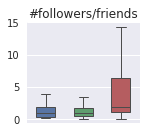

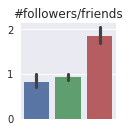

In [6]:
sns.set()
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(chate))],df.loc[chate]['followers_count/friends_count'].tolist()],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(ccounter))],df.loc[ccounter]['followers_count/friends_count'].tolist()],columns = ['Users',''])
Noncounter_df = pd.DataFrame(np.c_[['Noncounter' for i in range(len(cNoncounter))],df.loc[cNoncounter]['followers_count/friends_count'].tolist()],columns = ['Users',''])
comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index= True)
comb_df = comb_df.apply(pd.to_numeric,errors = 'ignore')
plt.figure(figsize=(2.2,2))
plt.title('#followers/friends')
ax=  sns.boxplot(x = 'Users',y= '',data = comb_df,linewidth = 1,width = 0.5,showfliers = False)
ax.set_xticklabels('')
plt.xlabel('')
plt.tight_layout()
# plt.savefig('Images/'+ '#followersPERfriends' +'.eps', format='eps')
plt.show()
############################### Barplot ##############################
plt.figure(figsize=(2,2))
ax = sns.barplot(x = 'Users',y ='',data = comb_df,estimator = np.median )
plt.title('#followers/friends')
# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value
#         patch.set_width(new_value)
#         patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .5)
ax.set_xticklabels('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [7]:
np.median(counter_df[''].values.astype(float)),np.median(Noncounter_df[''].values.astype(float)),np.median(hate_df[''].values.astype(float))

(0.9346719503500001, 0.8298070716500001, 1.8463476071)

In [ ]:
df = pd.read_json('Refined_Project_Dataset/Binny_Tagged_Final.json')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
find0 ,find1,find2 = [],[],[]
targets = ['jews','jew','muslim','muslims','america','americans','men','women','woman','females',
            'female','fat','niggers','whites','white','arabs','mexicans','black','nigger',
           'lesbian','gay','lgbt','lgbtq','asian','islam','niggas','blacks',
           'transgender','indians','indian']
for tweet,Id in zip(df['original_tweet'].tolist(),df['original_tweetid'].tolist()):
    unique_targets = []
    for target in targets:
        for i in re.findall(target,tweet.lower()):
#         for i in set(tweet.lower().split()).intersection(set(target)):
            if i!='women':
                unique_targets.append(lemmatizer.lemmatize(i))
            else:
                unique_targets.append(i)
    unique_targets = [i for i in set(unique_targets)]
#     for target1,target2 in [('america','american'),('men','women'),('asian','asia')]:
    print(unique_targets)
    for tar1,tar2 in [('america','american'),('men','women'),('asia','asian')]:
        if (tar2 in unique_targets) and (tar1 in unique_targets) :
            del unique_targets[unique_targets.index(tar1)]
            print('-------',unique_targets)
    if len(set(unique_targets))==0:
        find0.append([Id,tweet])
    elif len(set(unique_targets))==1:
        find1.append([Id,tweet])
    else:
        find2.append([Id,tweet])

In [10]:
v1,_=zip(*find1)
v2,_ = zip(*find2)
len(set(v1)),len(set(v2))

(496, 61)

In [11]:
len(find0)+len(find1)+len(find2)

1513

In [ ]:
targets = ['jews','jew','muslim','muslims','america','americans','men','women','woman','females',
            'female','fat','whites','white','arabs','mexicans','black','niggers','nigger',
           'niggas','blacks','lesbian','gay','lgbt','lgbtq','asian','islam',
           'transgender','indians','indian']
gender,gen = [],['men','women','woman','female','females']
ethinicity,eth = [],['niggas','nigga','niggers','nigger','white','whites','black','blacks']
physical_trait,phy = [],['fat']
sexual_orientation,sex = [],['lesbians','lesbian','gay','gays','lgbtq','lgbt','transgender']
natonality,nat = [],['america','americans','indians','india','mexicans','mexican','arabs','asians','asia']
religion,rel = [],['jew','jews','islam','muslims','muslim']
df.head(1)

In [13]:
hate_usernames = set(df['original_tweetusername'].values.tolist())
counter_usernames = set(df[df.tag!='0']['replier_user_name'].values.tolist())
Non_counter_usernames = set(df[df.tag=='0']['replier_user_name'].values.tolist())
len(hate_usernames),len(counter_usernames),len(Non_counter_usernames)

(548, 1239, 220)

In [ ]:
with open('Refined_Project_Dataset/user_info.pkl','rb') as fp:
    data = pickle.load(fp)
user_temp = pd.read_json('Refined_Project_Dataset/user_temp.json')
user_temp.index = data.keys()
user_temp = user_temp.apply(pd.to_numeric,errors = 'ignore')
user_temp.head(1)

In [15]:
verified_hate = hate_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist()))
verified_counter = counter_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist()))
verified_Noncounter = Non_counter_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist()))
len(hate_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist()))),len(counter_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist()))),len(Non_counter_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist())))

(18, 7, 0)

In [16]:
for tweet,Id in zip(df['original_tweet'].tolist(),df['original_tweetid'].tolist()):
    for target in gen:
        if re.findall(target,tweet.lower())!= list():
            gender.append(Id)
    for target in eth:
        if re.findall(target,tweet.lower())!= list():
            ethinicity.append(Id)
    for target in phy:
        if re.findall(target,tweet.lower())!= list():
            physical_trait.append(Id)
    for target in sex:
        if re.findall(target,tweet.lower())!= list():
            sexual_orientation.append(Id)
    for target in rel:
        if re.findall(target,tweet.lower())!= list():
            religion.append(Id)
    for target in nat:
        if re.findall(target,tweet.lower())!= list():
            natonality.append(Id)

In [17]:
len(set(gender+ethinicity+physical_trait+sexual_orientation+natonality+religion))

557

In [18]:
len(set(gender)),len(set(sexual_orientation)),len(set(natonality)),len(set(religion)),len(set(physical_trait)),len(set(ethinicity))

(120, 110, 43, 143, 91, 99)

## Usernames per Community : 

In [19]:
gender_hatenames,sexual_orientation_hatenames,natonality_hatenames,religion_hatenames,physical_trait_hatenames,ethinicity_hatenames = [],[],[],[],[],[]
for j in set(gender):
    gender_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
for j in set(sexual_orientation):
    sexual_orientation_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
for j in set(natonality):
    natonality_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
for j in set(religion):
    religion_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
for j in set(physical_trait):
    physical_trait_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
for j in set(ethinicity):
    ethinicity_hatenames.append(df[df['original_tweetid']== j]['original_tweetusername'].values[0])
gender_hatenames = [i for i in set(gender_hatenames)]
sexual_orientation_hatenames = [i for i in set(sexual_orientation_hatenames)]
natonality_hatenames = [i for i in set(natonality_hatenames)]
religion_hatenames = [i for i in set(religion_hatenames)]
physical_trait_hatenames = [i for i in set(physical_trait_hatenames)]
ethinicity_hatenames = [i for i in set(ethinicity_hatenames)]

In [20]:
######################### Usernames ####################3
len(gender_hatenames),len(sexual_orientation_hatenames),len(natonality_hatenames),len(religion_hatenames),len(physical_trait_hatenames),len(ethinicity_hatenames)

(119, 110, 41, 137, 91, 97)

In [21]:
############################# Intersection with verified hate  ######################
len(set(gender_hatenames).intersection(set(verified_hate))),len(set(sexual_orientation_hatenames).intersection(set(verified_hate))),len(set(natonality_hatenames).intersection(set(verified_hate))),len(set(religion_hatenames).intersection(set(verified_hate))),len(set(physical_trait_hatenames).intersection(set(verified_hate))),len(set(ethinicity_hatenames).intersection(set(verified_hate)))

(10, 4, 1, 2, 0, 3)

## Counterspeech tag distribution  for each Community:

In [22]:
gen_tags,sex_orientation_tags,nat_tags,rel_tags,phy_trait_tags,eth_tags = [],[],[],[],[],[]
gender_tags,sexual_orientation_tags,natonality_tags,religion_tags,physical_trait_tags,ethinicity_tags = [],[],[],[],[],[]
for j in set(gender):
    gen_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
for j in set(sexual_orientation):
    sex_orientation_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
for j in set(natonality):
    nat_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
for j in set(religion):
    rel_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
for j in set(physical_trait):
    phy_trait_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
for j in set(ethinicity):
    eth_tags.append(df[df['original_tweetid']== j]['tag'].tolist())
#--------------------------------------------------------------------------------------------
for tag in gen_tags:
    gender_tags+=tag
for tag in sex_orientation_tags:
    sexual_orientation_tags+=tag
for tag in nat_tags:
    natonality_tags+=tag
for tag in rel_tags:
    religion_tags+=tag
for tag in phy_trait_tags:
    physical_trait_tags+=tag
for tag in eth_tags:
    ethinicity_tags+=tag

## For Verified:

In [23]:
categories = ['0','1','2','3','4','5','6','7','8','9','11']
ver,ver_ = [],[]
for j in set(gender_hatenames).intersection(set(verified_hate)):
    ver.append(df[df['original_tweetusername']== j]['tag'].tolist())
for i in ver:
    ver_+=i
dict_ = {}
for j in categories:
    dict_[j] = (re.findall(r'\d+',(' '.join(ver_)))).count(j)
print("Verified Hate Users(Target-Gender) Tag distribution : \n {}\n".format(dict_))

Verified Hate Users(Target-Gender) Tag distribution : 
 {'0': 9, '1': 0, '2': 8, '3': 0, '4': 4, '5': 1, '6': 2, '7': 2, '8': 8, '9': 2, '11': 5}



In [24]:
############### Find 0  categories ##################3
categories = ['0','1','2','3','4','5','6','7','8','9','11']
dict_
for i in categories:
    dict_[i] = (re.findall(r'\d+',(' '.join(df[df['original_tweetid']==976274221818109952]['tag'].tolist())))).count(i)
find0_Categories = [i for i in dict_.values()]

In [28]:
categories = ['0','1','2','3','4','5','6','7','8','9','11']
table = []
for i,community in zip([gender_tags,sexual_orientation_tags,natonality_tags,religion_tags,physical_trait_tags,ethinicity_tags],['Gender','Sexual_orientation','Nationality','Religion','Physical_trait','Ethinicity']):
    dict_ = {}
    for j in categories:
        dict_[j] = (re.findall(r'\d+',(' '.join(i)))).count(j)
    table.append(dict_) 
    print("{} : \n {}\n".format(community,dict_))

Gender : 
 {'0': 84, '1': 1, '2': 38, '3': 3, '4': 14, '5': 15, '6': 36, '7': 32, '8': 47, '9': 50, '11': 55}

Sexual_orientation : 
 {'0': 19, '1': 5, '2': 19, '3': 9, '4': 9, '5': 20, '6': 20, '7': 30, '8': 34, '9': 39, '11': 21}

Nationality : 
 {'0': 17, '1': 5, '2': 16, '3': 4, '4': 9, '5': 12, '6': 17, '7': 6, '8': 13, '9': 32, '11': 10}

Religion : 
 {'0': 69, '1': 125, '2': 100, '3': 20, '4': 19, '5': 50, '6': 12, '7': 39, '8': 37, '9': 112, '11': 54}

Physical_trait : 
 {'0': 4, '1': 0, '2': 7, '3': 2, '4': 2, '5': 3, '6': 3, '7': 12, '8': 15, '9': 65, '11': 37}

Ethinicity : 
 {'0': 26, '1': 2, '2': 7, '3': 25, '4': 4, '5': 34, '6': 18, '7': 8, '8': 13, '9': 81, '11': 24}



In [29]:
table = pd.DataFrame(table ,columns = ['Hate Type','0','1','2','3','4','5','6','7','8','9','11'])
table['Hate Type'] = ['Gender','Sexual_orientation','Nationality','Religion','Physical_trait','Ethinicity']
table.loc[3]=['Religion' ,86, 125, 104,  35,  24,  53,  41,  51,  64, 124,  79]
table['num_tweets'] = [120, 110, 43, 143, 91, 99]
table.loc[6] = ['Total',table['0'].sum(),table['1'].sum(),table['2'].sum(),table['3'].sum(),table['4'].sum(),
                table['5'].sum(),table['6'].sum(),table['7'].sum(),table['8'].sum(),table['9'].sum(),table['11'].sum()
               ,table['num_tweets'].sum()]
table['Total'] = table.apply(lambda x : x[2:-1].values.sum(),axis = 1)
# table.to_csv('Refined_Project_Dataset/Community_Analysis.csv')
table

,Hate Type,0,1,2,3,4,5,6,7,8,9,11,num_tweets,Total
0,Gender,84,1,38,3,14,15,36,32,47,50,55,120,291
1,Sexual_orientation,19,5,19,9,9,20,20,30,34,39,21,110,206
2,Nationality,17,5,16,4,9,12,17,6,13,32,10,43,124
3,Religion,86,125,104,35,24,53,41,51,64,124,79,143,700
4,Physical_trait,4,0,7,2,2,3,3,12,15,65,37,91,146
5,Ethinicity,26,2,7,25,4,34,18,8,13,81,24,99,216
6,Total,236,138,191,78,62,137,135,139,186,391,226,606,1683


In [93]:
table1 = table.drop(['Total','0','num_tweets'],axis = 1)
for i in table1.columns[1:]:
    table1[i]=table1[i].apply(lambda x:x/table1[table1['Hate Type']=='Total'][i].values[0])
# table1.to_csv('Refined_Project_Dataset/Community Analysis1.csv')
table1

,Hate Type,1,2,3,4,5,6,7,8,9,11
0,Gender,0.007246,0.198953,0.038462,0.225806,0.109489,0.266667,0.230216,0.252688,0.127877,0.243363
1,Sexual_orientation,0.036232,0.099476,0.115385,0.145161,0.145985,0.148148,0.215827,0.182796,0.099744,0.092920
2,Nationality,0.036232,0.083770,0.051282,0.145161,0.087591,0.125926,0.043165,0.069892,0.081841,0.044248
3,Religion,0.905797,0.544503,0.448718,0.387097,0.386861,0.303704,0.366906,0.344086,0.317136,0.349558
4,Physical_trait,0.000000,0.036649,0.025641,0.032258,0.021898,0.022222,0.086331,0.080645,0.166240,0.163717
5,Ethinicity,0.014493,0.036649,0.320513,0.064516,0.248175,0.133333,0.057554,0.069892,0.207161,0.106195
6,Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
table2 = table.drop(6)
table2 = table.drop(['0','num_tweets'],axis = 1)
table2[['1','2','3','4','5','6','7','8','9','11','Total']]=table2.drop('Hate Type',axis = 1).apply(lambda x:x/x['Total'],axis = 1)
# table2.to_csv('Refined_Project_Dataset/Community Analysis2.csv')
table2

,Hate Type,1,2,3,4,5,6,7,8,9,11,Total
0,Gender,0.003436,0.130584,0.010309,0.048110,0.051546,0.123711,0.109966,0.161512,0.171821,0.189003,1.0
1,Sexual_orientation,0.024272,0.092233,0.043689,0.043689,0.097087,0.097087,0.145631,0.165049,0.189320,0.101942,1.0
2,Nationality,0.040323,0.129032,0.032258,0.072581,0.096774,0.137097,0.048387,0.104839,0.258065,0.080645,1.0
3,Religion,0.178571,0.148571,0.050000,0.034286,0.075714,0.058571,0.072857,0.091429,0.177143,0.112857,1.0
4,Physical_trait,0.000000,0.047945,0.013699,0.013699,0.020548,0.020548,0.082192,0.102740,0.445205,0.253425,1.0
5,Ethinicity,0.009259,0.032407,0.115741,0.018519,0.157407,0.083333,0.037037,0.060185,0.375000,0.111111,1.0
6,Total,0.081996,0.113488,0.046346,0.036839,0.081402,0.080214,0.082591,0.110517,0.232323,0.134284,1.0


In [11]:
import json
with open('Refined_Project_Dataset/Hate_tweets_likes_retweets.json','r') as fp:
    hate_tweets_likes_retweets = json.load(fp)
with open('Refined_Project_Dataset/Counter_replies_retweets_likes.json','r') as fp:
    counter_tweets_likes_retweets = json.load(fp)
with open('Refined_Project_Dataset/NonCounter_replies_retweets_likes.json','r') as fp:
    Noncounter_tweets_likes_retweets = json.load(fp)
data1 = pd.read_json('replies_of_extra_tweets.json') 
data2 = pd.read_json('Refined_Project_Dataset/navish_counterspeech_data.json')

In [ ]:
data1.head(2)

In [20]:
Ids = []
for i in hate_tweets_likes_retweets:
    Ids.append(int(i['hate_id']))
Ids = set(Ids)
len(set(Ids))

370

In [38]:
hate_usernamesID = set(df['original_tweetid'].values.astype(str))
counter_usernamesID = set(df[df.tag!='0']['reply_id'].values.astype(str))
Non_counter_usernamesID = set(df[df.tag=='0']['reply_id'].values.astype(str))
len(hate_usernamesID),len(counter_usernamesID),len(Non_counter_usernamesID)

(558, 1290, 223)

In [59]:
from collections import defaultdict
replies = []
r = defaultdict(int)
temp1, temp2,temp_set = 0,0,set()
for d in data1['original_tweetid'].tolist():
    if str(d) in hate_usernamesID: 
        temp1 += 1
        temp_set.add(str(d))
        replies.append(data1[data1['original_tweetid']== d]['reply_id'].tolist())
        r[str(d)] = len(set(data1[data1['original_tweetid']== d]['reply_id'].tolist()))
for d in data2['original_tweetid'].tolist():
    if str(d) in hate_usernamesID: 
        temp2 += 1
        temp_set.add(str(d))
        replies.append(data2[data2['original_tweetid']== d]['reply_id'].tolist())
        r[str(d)] = len(set(data2[data2['original_tweetid']== d]['reply_id'].tolist()))
rep = []
for i in replies:
    rep += i

In [67]:
t =[]
for i in r.values():
    t.append(i)
np.mean(t),np.median(t)

(3.0667976424361494, 2.0)

In [52]:
temp1,temp2, len(temp_set)

(226, 1363, 509)

In [50]:
len(set(rep))

1561

In [48]:
len(set(hate_usernamesID).intersection(set(data1['original_tweetid'].astype(str).tolist())))+len(set(hate_usernamesID).intersection(set(data2['original_tweetid'].astype(str).tolist())))

509

In [53]:
558*1561/509

1711.2730844793714